# Data processing with Pandas

## Importing Necessary Libraries

In [34]:
# Import the Pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Reading the File

In [41]:
file_path = 'romania_weather/weather_2011_Bucharest.csv'  # Replace with your file path
# file_path = 'archive/weather_2011_Bucharest.csv'  # Replace with your file path
# colnames = ['Stations ID', 'Zeit', 'QUALITAETS_NIVEAU', 'STRUKTUR_VERSION', 'Lufttemperatur [Grad C]', 'Relative Luftfeuchte [%]', 'eor' ]
# Load the text data into a DataFrame
df = pd.read_csv(file_path)#, sep=',')#, names = colnames, header=None)#, usecols=['Zeit','Lufttemperatur [Grad C]', 'Relative Luftfeuchte [%]'])

# Display the first few rows of the DataFrame
# df.head()

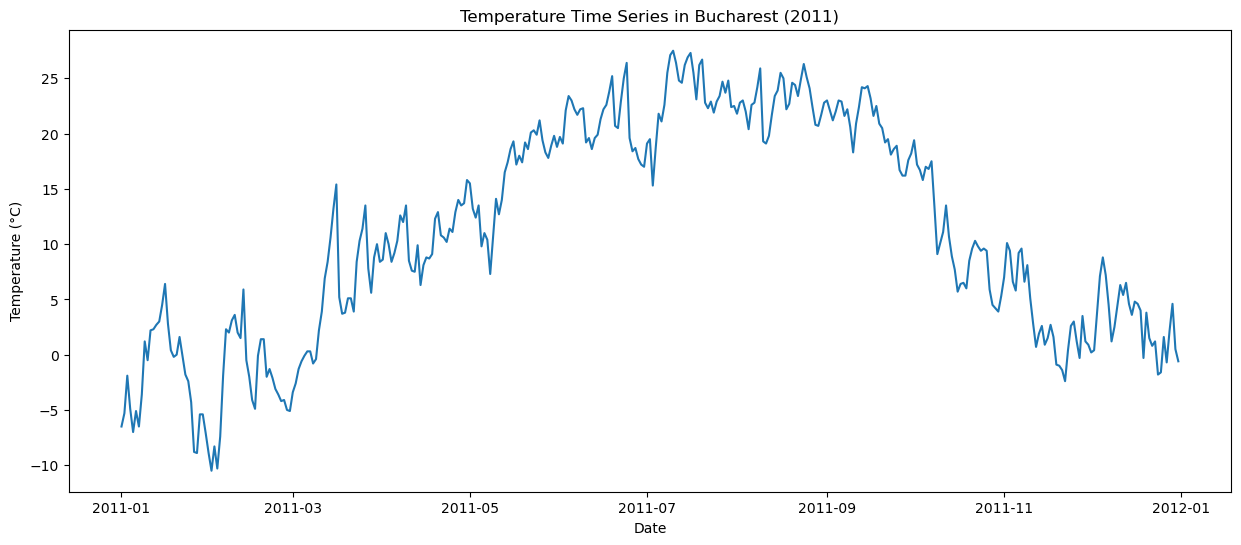

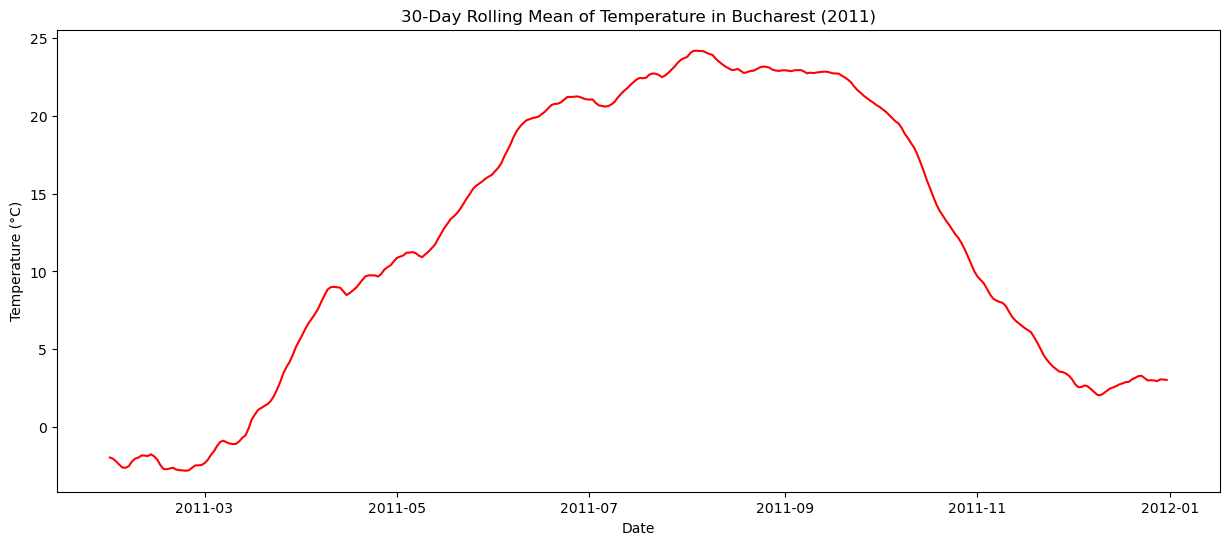

In [42]:
# Convert the 'Date time' column to datetime and set it as the index
df['Date time'] = pd.to_datetime(df['Date time'])
df.set_index('Date time', inplace=True)

# Using the 'Temperature' column for the analysis
# Plotting the temperature over time for initial visualization
plt.figure(figsize=(15, 6))
plt.plot(df['Temperature'])
plt.title('Temperature Time Series in Bucharest (2011)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# To better observe trends, calculate the rolling average with a 30-day window
df['Temperature_Rolling_Mean'] = df['Temperature'].rolling(window=30).mean()

# Plotting the 30-day rolling mean of temperature
plt.figure(figsize=(15, 6))
plt.plot(df['Temperature_Rolling_Mean'], color='red')
plt.title('30-Day Rolling Mean of Temperature in Bucharest (2011)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


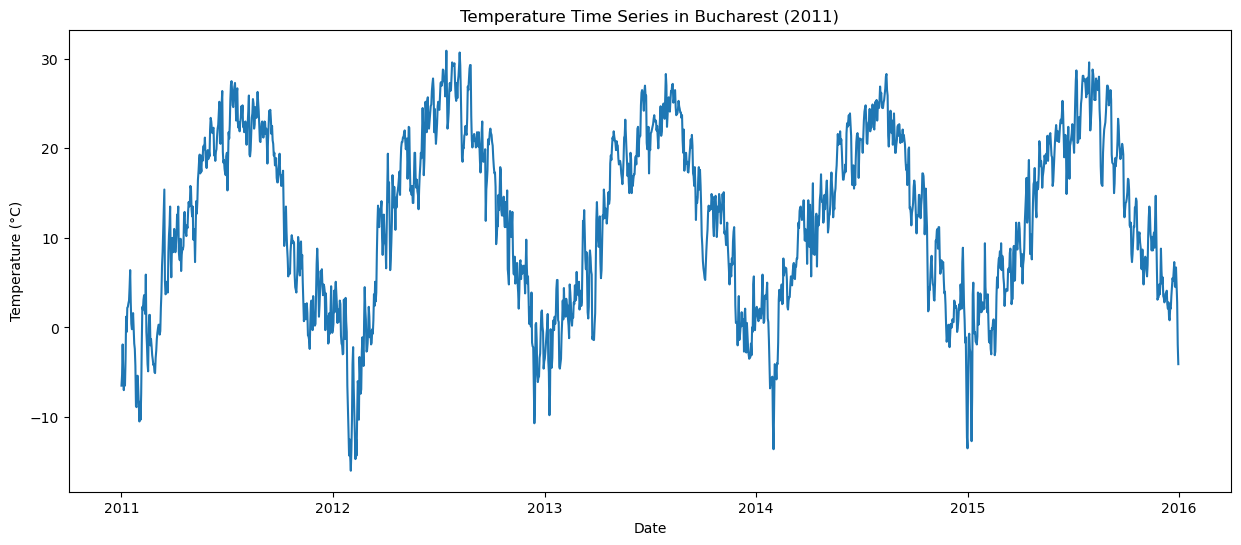

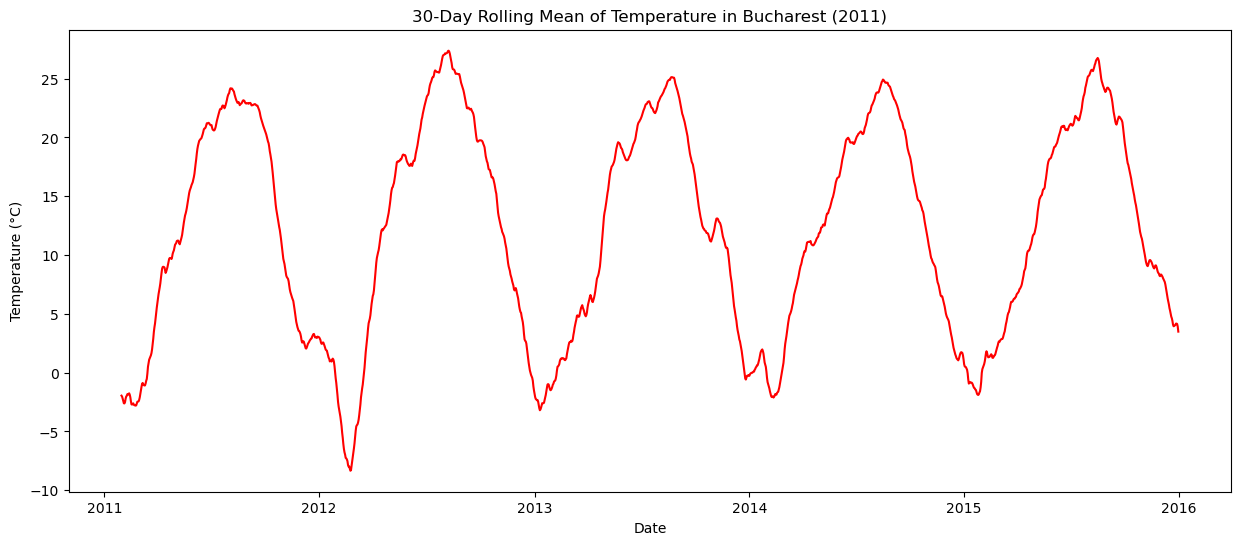

In [57]:

# Load the datasets
df_2011 = pd.read_csv('romania_weather/weather_2011_Bucharest.csv')
df_2012 = pd.read_csv('romania_weather/weather_2012_Bucharest.csv')
df_2013 = pd.read_csv('romania_weather/weather_2013_Bucharest.csv')
df_2014 = pd.read_csv('romania_weather/weather_2014_Bucharest.csv')
df_2015 = pd.read_csv('romania_weather/weather_2015_Bucharest.csv')

# df['Date time'] = pd.to_datetime(df['Date time'])
# df_2011.set_index('Date time', inplace=True)
# df_2012.set_index('Date time', inplace=True)
# Concatenate the dataframes
df_combined = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015])

# If your data has a date column and you want to sort it, do the following:
# Convert the date column to datetime if it's not already
df_combined['Date time'] = pd.to_datetime(df_combined['Date time'])
# # Sort by date
df_combined = df_combined.sort_values(by='Date time')

# Optionally, reset the index of the combined dataframe
df_combined = df_combined.reset_index(drop=True)
df = df_combined
# Now df_combined contains the merged data from different years

# Convert the 'Date time' column to datetime and set it as the index
df['Date time'] = pd.to_datetime(df['Date time'])
df.set_index('Date time', inplace=True)

# Using the 'Temperature' column for the analysis
# Plotting the temperature over time for initial visualization
plt.figure(figsize=(15, 6))
plt.plot(df['Temperature'])
plt.title('Temperature Time Series in Bucharest (2011)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# To better observe trends, calculate the rolling average with a 30-day window
df['Temperature_Rolling_Mean'] = df['Temperature'].rolling(window=30).mean()

# Plotting the 30-day rolling mean of temperature
plt.figure(figsize=(15, 6))
plt.plot(df['Temperature_Rolling_Mean'], color='red')
plt.title('30-Day Rolling Mean of Temperature in Bucharest (2011)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

## Calculating Correlation

In [49]:

correlation_p = df['Temperature'].corr(df['Relative Humidity'], method='pearson')
# Calculate and print the correlation coefficient
# correlation = df['Temperature'].corr(df['Humidity'])
print(f"Pearson Correlation coefficient between temperature and humidity: {correlation_p}")

correlation_s = df['Temperature'].corr(df['Relative Humidity'], method='spearman')
print(f"Spearman Correlation coefficient between temperature and humidity: {correlation_s}")


Pearson Correlation coefficient between temperature and humidity: -0.6444127689305867
Spearman Correlation coefficient between temperature and humidity: -0.6614482531671546


## Identifying Period in the Time Series using Fourier Transform 

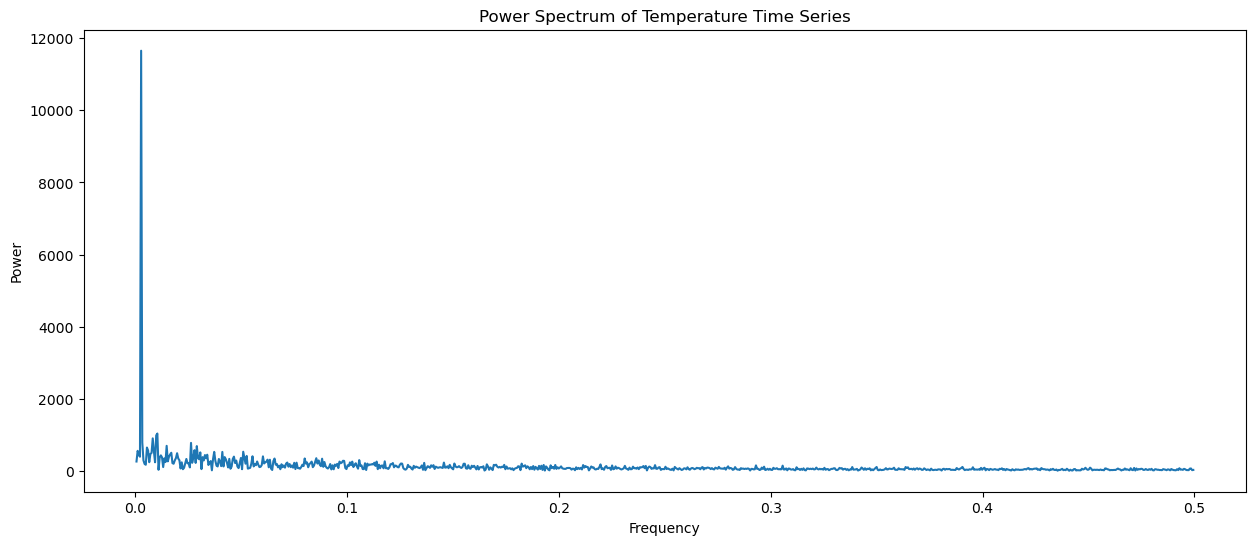

Dominant frequency 0.002738225629791895
Dominant Period (in days): 365.2
Dominant Period (in hours): 8764.8


In [55]:
# Select the Temperature column for FFT
temperature = df['Temperature']

# Perform Fast Fourier Transform (FFT)
fft_result = np.fft.fft(temperature)
frequencies = np.fft.fftfreq(len(fft_result))

# Find the power spectrum
power = np.abs(fft_result)

n = len(temperature)
L = np.arange(1, np.floor(n/2), dtype='int') # Only plot the first half of frequencies (see 7(a) below)

# Plot the power spectrum
plt.figure(figsize=(15, 6))
plt.plot(frequencies[L], power[L])
plt.title('Power Spectrum of Temperature Time Series')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# Identify the dominant frequency
# Ignoring the zero frequency component for mean period calculation (see 7(c) below)
non_zero_frequencies = frequencies[1:]
dominant_frequency = np.abs(non_zero_frequencies[np.argmax(power[1:])])

print ("Dominant frequency", dominant_frequency)
# Calculate the period (inverse of the frequency)
period = 1 / dominant_frequency
period_days = period * len(temperature) / len(temperature)  # Convert period to hours
period_hours = period * len(temperature) * 24 / len(temperature)  # Convert period to hours

print("Dominant Period (in days):", period_days)
print("Dominant Period (in hours):", period_hours)


## Fourier Transform in Time Series Analysis: Finding Periodicity

### 1. Basic Concept:
- **Purpose in Time Series**: Identifies dominant cycles or periodic patterns in time series data.
- **Key Utility**: Transforms time series data to reveal the contribution of different frequencies (or periods).

### 2. Mathematical Foundations:
- **Continuous Fourier Transform (CFT)**: Used for continuous time series data.
  - Formula: `F(ω) = ∫f(t)e^(-2πiωt)dt`
  - `f(t)`: time series data
  - `F(ω)`: frequency spectrum representation
- **Discrete Fourier Transform (DFT)**: Used for discrete time series data.
  - Formula: `F(k) = Σf(n)e^(-2πi(kn/N))`
  - `N`: number of data points
  - `k`: frequency components

### 3. Understanding Periodicity:
- **Period vs. Frequency**: Frequency domain representation shows how patterns repeat over time. Period is the inverse of frequency.
- **Spectral Analysis**: Peaks in frequency spectrum indicate prevalent periods in data.

### 4. Practical Application:
- **Example**: Daily temperature data over years can reveal annual seasonal variations.
- **Visualization**: Peaks in the spectrum indicate significant periods in the data.

### 5. Applications in Time Series Analysis:
- **Seasonality Detection**: Identifies seasonal patterns in various domains.
- **Signal Decomposition**: Breaks down complex time series into simpler periodic components.

### 6. Challenges and Considerations:
- **Resolution**: Time series length affects the ability to detect longer periods.
- **Aliasing**: Consideration of sampling rates in digital data for accurate period detection.
- **Fast Fourier Transform (FFT)**: Efficient algorithm for computing DFT in large datasets.

### 7. Additional Notes:
a) **Why first half of frequencies?**: When analyzing real-valued data with the Fourier Transform, only the first half of the frequencies is plotted because the spectrum exhibits symmetry: the second half is a mirror image of the first, containing no additional information. This symmetry occurs due to the complex conjugate nature of the Fourier Transform for real inputs. Frequencies beyond the Nyquist frequency (half the sampling rate) do not provide unique insights for such signals. Hence, focusing on the first half simplifies analysis, avoiding redundancy and enhancing clarity in interpreting the frequency components of the signal.

b)  **Nyquist frequency**: The Nyquist frequency, defined as half the sampling rate of a discrete signal, is the maximum frequency that can be accurately sampled without aliasing. For any discrete time series the number of frequencies at which the data can vary will be limited by the Nyquist freqency, which is the highest frequency of variation that the observed data can provide any variation. For example, with the temperature data, we have daily measurements, which represent 24-hour averages. As a result, the data cannot provide any information about variation in the data at a time scale less than 24 hours or daily. If there is a diurnal pattern in the data, so may be the it’s always hotter at 4pm than at 4am, we cannot learn this from the data. 
    
If we have n observations, then the most number of cycles that we can observe in the time series is n/2, or one cycle every other data point. Another way of saying that is that the Nyquist frequency is  f=1/2, i.e. a half a cycle per day or one cycle per 2 days. If we wanted information about higher frequency variation in temperature, we would need to make more observations. For example, if we had hourly measurements of temperature, then we would have information about the within-day variation in temperature.

c) **Why ignore zeroth frequency component for period estimation?**:
In Fourier transform, the zeroth element of frequency represents the DC component or the average value of the signal. When estimating the period using Fourier transform, it is often ignored because it does not provide information about the periodic behavior of the signal.

By ignoring the zeroth element, we can focus on the actual periodic components of the signal and avoid any bias introduced by the DC component.

### Conclusion:
Fourier Transform is vital in time series analysis for uncovering periodicities and understanding cyclical nature of data, essential in fields like economics, meteorology, and data science.

### Additional links:
- See this video to understand Fourier Transform fundamentals: https://www.youtube.com/watch?v=spUNpyF58BY
- https://towardsdatascience.com/fourier-transform-for-time-series-292eb887b101
